# Data Wrangling And Analyze Data

# Introduction
This project focused on wrangling data from the WeRateDogs Twitter account using Python, documented in a Jupyter Notebook (wrangle_act.ipynb). This Twitter account rates dogs with humorous commentary. The rating denominator is usually 10, however, the numerators are usually greater than 10. They’re Good Dogs Brent wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

### The Data
**Enhanced Twitter Archive**

>The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced.".We manually downloaded this file manually by clicking the following link: twitter_archive_enhanced.csv

**Additional Data via the Twitter API**
>Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But we, because we have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? We're going to query Twitter's API to gather this valuable data.

**Image Predictions File**
>The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and we downloaded it programmatically using python Requests library on the following (URL of the file: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

### Key Points
Key points to keep in mind when data wrangling for this project:

- We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

- Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.

- Cleaning includes merging individual pieces of data according to the rules of tidy data.

- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

- We do not need to gather the tweets beyond August 1st, 2017. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

## Project Details
Fully assessing and cleaning the entire dataset would require exceptional effort so only a subset of its issues (eight quality issues and two tidiness issues at minimum) needed to be assessed and cleaned.

The tasks for this project were:

<ul><li>Data wrangling, which consists of:</li>
    <ul><li>Gathering data</li>
        <li>Assessing data</li>
        <li>Cleaning data</li></ul>
    <li>Storing, analyzing, and visualizing our wrangled data</li>
    <li>Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations</li></ul>

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings

## Gather

In [2]:
# read csv as a Pandas DataFrame
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file.**

In [6]:
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""

In [7]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [8]:
# List of the error tweets
error_list = []
# List of tweets
df_list = []
# Calculate the time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] # How many followers the user had
        user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
        date_time = tweet['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
# Calculate the time of excution
end = time.time()
print(end - start)

892420643555336193 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
892177421306343426 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
891815181378084864 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
891689557279858688 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
891327558926688256 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
891087950875897856 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890971913173991426 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890729181411237888 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890609185150312448 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890240255349198849 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
890006608113172480 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
889880896479866881 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
889665388333682689 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
889638837579

871515927908634625 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
871166179821445120 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
871102520638267392 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
871032628920680449 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870804317367881728 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870726314365509632 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870656317836468226 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870374049280663552 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870308999962521604 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
870063196459192321 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
869988702071779329 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
869772420881756160 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
869702957897576449 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
869596645499

850753642995093505 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
850380195714523136 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
850333567704068097 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
850145622816686080 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
850019790995546112 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849776966551130114 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849668094696017920 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849412302885593088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849336543269576704 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
849051919805034497 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
848690551926992896 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
848324959059550208 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
848213670039564288 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
848212111729

834086379323871233 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833863086058651648 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833826103416520705 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833732339549220864 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833722901757046785 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833479644947025920 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
833124694597443584 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832998151111966721 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832769181346996225 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832757312314028032 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832682457690300417 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832645525019123713 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832636094638288896 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
832397543355

820749716845686786 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820690176645140481 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820494788566847489 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820446719150292993 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820314633777061888 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820078625395449857 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
820013781606658049 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819952236453363712 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819924195358416896 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819711362133872643 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819588359383371776 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819347104292290561 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819238181065359361 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
819227688460

806542213899489280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
806242860592926720 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
806219024703037440 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805958939288408065 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805932879469572096 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805826884734976000 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805823200554876929 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805520635690676224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805487436403003392 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
805207613751304193 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
804738756058218496 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
804475857670639616 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
804413760345620481 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
804026241225

793120401413079041 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792913359805018113 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792883833364439040 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792773781206999040 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792394556390137856 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
792050063153438720 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791821351946420224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791784077045166082 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791780927877898241 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791774931465953280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791672322847637504 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791406955684368384 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791312159183634433 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
791026214425

778650543019483137 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778624900596654080 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778408200802557953 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778396591732486144 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778383385161035776 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778286810187399168 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778039087836069888 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
778027034220126208 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777953400541634568 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777885040357281792 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777684233540206592 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777641927919427584 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777621514455814149 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
777189768882

762464539388485633 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
762316489655476224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
762035686371364864 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761976711479193600 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761750502866649088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761745352076779520 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761672994376806400 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761599872357261312 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761371037149827077 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761334018830917632 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761292947749015552 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761227390836215808 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
761004547850530816 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
760893934457

750086836815486976 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750071704093859840 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750056684286914561 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750041628174217216 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750026558547456000 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
750011400160841729 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749996283729883136 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749981277374128128 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749774190421639168 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749417653287129088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749403093750648834 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749395845976588288 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749317047558017024 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
749075273010

738891149612572673 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738885046782832640 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738883359779196928 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738537504001953792 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738402415918125056 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738184450748633089 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738166403467907072 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
738156290900254721 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737826014890496000 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737800304142471168 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737678689543020544 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737445876994609152 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737322739594330112 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
737310737551

718454725339934721 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
718246886998687744 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
718234618122661888 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717841801130979328 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717790033953034240 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717537687239008257 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717428917016076293 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717421804990701568 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717047459982213120 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
717009362452090881 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
716802964044845056 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
716791146589110272 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
716730379797970944 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
716447146686

707969809498152960 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707776935007539200 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707741517457260545 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707738799544082433 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707693576495472641 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707629649552134146 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707610948723478529 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707420581654872064 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707411934438625280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707387676719185920 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707377100785885184 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707315916783140866 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707297311098011648 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
707059547140

699370870310113280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699323444782047232 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699088579889332224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699079609774645248 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699072405256409088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699060279947165696 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
699036661657767936 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698989035503689728 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698953797952008193 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698907974262222848 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698710712454139905 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698703483621523456 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698635131305795584 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
698549713696

691321916024623104 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
691096613310316544 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
691090071332753408 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690989312272396288 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690959652130045952 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690938899477221376 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690932576555528194 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690735892932222976 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690728923253055490 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690690673629138944 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690649993829576704 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690607260360429569 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690597161306841088 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
690400367696

684940049151070208 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684926975086034944 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684914660081053696 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684902183876321280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684880619965411328 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684830982659280897 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684800227459624960 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684594889858887680 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684588130326986752 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684567543613382656 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684538444857667585 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684481074559381504 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684460069371654144 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
684241637099

679872969355714560 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679862121895714818 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679854723806179328 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679844490799091713 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679828447187857408 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679777920601223168 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679736210798047232 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679729593985699840 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679722016581222400 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679530280114372609 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679527802031484928 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679511351870550016 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679503373272485890 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
679475951516

676098748976615425 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
676089483918516224 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675898130735476737 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675891555769696257 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675888385639251968 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675878199931371520 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675870721063669760 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675853064436391936 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675849018447167488 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675845657354215424 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675822767435051008 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675820929667219457 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675798442703122432 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
675781562965

673708611235921920 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673707060090052608 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673705679337693185 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673700254269775872 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673697980713705472 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673689733134946305 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673688752737402881 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673686845050527744 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673680198160809984 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673662677122719744 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673656262056419329 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673636718965334016 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673612854080196609 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
673583129559

671486386088865792 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671485057807351808 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671390180817915904 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671362598324076544 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671357843010908160 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671355857343524864 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671347597085433856 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671186162933985280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671182547775299584 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671166507850801152 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671163268581498880 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671159727754231808 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671154572044468225 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
671151324042

669567591774625800 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669564461267722241 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669393256313184256 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669375718304980992 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669371483794317312 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669367896104181761 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669363888236994561 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669359674819481600 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669354382627049472 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669353438988365824 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669351434509529089 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669328503091937280 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669327207240699904 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
669324657376

667517642048163840 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667509364010450944 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667502640335572993 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667495797102141441 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667491009379606528 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667470559035432960 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667455448082227200 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667453023279554560 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667443425659232256 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667437278097252352 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667435689202614272 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667405339315146752 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667393430834667520 _ [{'code': 215, 'message': 'Bad Authentication data.'}]
667369227918

In [25]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [27]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38952,8636,6629272,132918,2017-08-01 16:23:56
1,892177421306343426,33352,6343,6629272,132918,2017-08-01 00:17:27
2,891815181378084864,25127,4209,6629272,132918,2017-07-31 00:18:03
3,891689557279858688,42300,8755,6629272,132918,2017-07-30 15:58:51
4,891327558926688256,40458,9517,6629272,132918,2017-07-29 16:00:24
...,...,...,...,...,...,...
2339,666049248165822465,109,40,6629803,132918,2015-11-16 00:24:50
2340,666044226329800704,301,141,6629803,132918,2015-11-16 00:04:52
2341,666033412701032449,125,44,6629803,132918,2015-11-15 23:21:54
2342,666029285002620928,131,47,6629803,132918,2015-11-15 23:05:30


In [28]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2344 non-null   int64 
 1   favorites        2344 non-null   int64 
 2   retweets         2344 non-null   int64 
 3   user_followers   2344 non-null   int64 
 4   user_favourites  2344 non-null   int64 
 5   date_time        2344 non-null   object
dtypes: int64(5), object(1)
memory usage: 110.0+ KB


## Gather: Summary
Gathering is the first step in the data wrangling process.

- Obtaining data
>- Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas
>- Downloading a file from the internet (image-predictions.tsv) Downloading file using requests
>- Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy
- Importing that data into our programming environment (Jupyter Notebook)
## Assessing

In [29]:
# Print some random examples
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
780,775733305207554048,NaN,NaN,2016-09-13 16:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo,None,None,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770414278...,11,10,Al,None,None,None,None
1968,673320132811366400,NaN,NaN,2015-12-06 01:56:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He's wearing blush. 11/10 rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
693,786963064373534720,NaN,NaN,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
2280,667393430834667520,NaN,NaN,2015-11-19 17:26:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fwed. He is a Canadian Asian Taylormad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667393430...,8,10,Fwed,None,None,None,None
808,771770456517009408,NaN,NaN,2016-09-02 18:03:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Davey. He'll have your daughter home b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None
1301,707629649552134146,NaN,NaN,2016-03-09 18:10:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate marshmallows but this on...,NaN,NaN,NaN,https://vine.co/v/iHhBOTl5p9z,10,10,None,None,None,None,None
1388,700462010979500032,NaN,NaN,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,None,None,None,None
410,823322678127919110,NaN,NaN,2017-01-23 00:13:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He's got the fastest paws in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,None,None,None,None
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,None,None,None,None


In [30]:
# Assessing the data programmaticaly
twitter_archive.info()
twitter_archive.describe()
twitter_archive['rating_numerator'].value_counts()
twitter_archive['rating_denominator'].value_counts()
twitter_archive['name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Timber       1
Orion        1
Sephie       1
Harnold      1
Skye         1
Name: name, Length: 957, dtype: int64

In [31]:
# View descriptive statistics of twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [33]:
image_prediction.info()
image_prediction['jpg_url'].value_counts()
image_prediction[image_prediction['jpg_url'] == 'https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True


In [34]:
# View number of entries for each source
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
#For rating that don't follow pattern
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [36]:
#unusual names
twitter_archive[twitter_archive['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [37]:
#Orignal Tweets 
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## Quality
Completeness, Validity, Accuracy, Consistency => a.k.a content issues

**twitter_archive dataset**

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- The numerator and denominator columns have invalid values.
- In several columns null objects are non-null (None to NaN).
- Name column have invalid names i.e 'None', 'a', 'an' and less than 3 characters.
- We only want original ratings (no retweets) that have images.
- We may want to change this columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string because We don't want any operations on them.
- Sources difficult to read.

**image_predictions dataset**

- Missing values from images dataset (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url
- Some tweets are have 2 different tweet_id one redirect to the other (Dataset contains retweets)

**tweet_data dataset**

- This tweet_id (666020888022790149) duplicated 8 times

## Tidiness
Untidy data => a.k.a structural issues

- No need to all the informations in images dataset, (tweet_id and jpg_url what matters)
- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
- Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

## Cleaning
Cleaning our data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step.

In [39]:
#copy dataframes
tweet_data_clean = tweet_data.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_prediction.copy()

**Define**

Add tweet_info and image_predictions to twitter_archive table.

**Code**

In [40]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [41]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

**Test**

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2068 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2068 non-null   object 
 4   source                      2068 non-null   object 
 5   text                        2068 non-null   object 
 6   retweeted_status_id         75 non-null     float64
 7   retweeted_status_user_id    75 non-null     float64
 8   retweeted_status_timestamp  75 non-null     object 
 9   expanded_urls               2068 non-null   object 
 10  rating_numerator            2068 non-null   int64  
 11  rating_denominator          2068 non-null   int64  
 12  name                        2068 non-null   object 
 13  doggo                       2068 

**Define**

Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'.

**Code**

In [43]:
# Select the columns to melt and to remain
MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in twitter_archive_clean.columns.tolist() if x not in MELTS_COLUMNS]


# Melt the the columns into values
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
twitter_archive_clean = twitter_archive_clean.drop('stages', 1)

**Test**

In [44]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None       7938
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64
8272


**Define**

Clean rows and columns that we will not need

**Code**

In [45]:
# Delete the retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

# Delete duplicated tweet_id
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

# Delete tweets with no pictures
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])

# small test
len(twitter_archive_clean)

2310

In [46]:
# Delete columns related to retweet we don't need anymore
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
twitter_archive_clean = twitter_archive_clean.drop('date_time', 1)

# small test
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

In [47]:
#Delete dog_stage duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

**Test**

In [48]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None       1687
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64
1993


**Define**

Get rid of image prediction columns

**Code**

In [49]:
# We will store the fisrt true algorithm with it's level of confidence
prediction_algorithm = []
confidence_level = []

# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

twitter_archive_clean.apply(get_prediction_confidence, axis=1)
twitter_archive_clean['prediction_algorithm'] = prediction_algorithm
twitter_archive_clean['confidence_level'] = confidence_level

**Test**

In [50]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [51]:
# Delete the columns of image prediction information
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [52]:
list(twitter_archive_clean)


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [53]:
# let's concentrate on low values.. let's dig more
twitter_archive_clean.info()
print('in_reply_to_user_id ')
print(twitter_archive_clean['in_reply_to_user_id'].value_counts())
print('source ')
print(twitter_archive_clean['source'].value_counts())
print('user_favourites ')
print(twitter_archive_clean['user_favourites'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 7089
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1993 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1993 non-null   object 
 4   source                 1993 non-null   object 
 5   text                   1993 non-null   object 
 6   expanded_urls          1993 non-null   object 
 7   rating_numerator       1993 non-null   int64  
 8   rating_denominator     1993 non-null   int64  
 9   name                   1993 non-null   object 
 10  favorites              1993 non-null   int64  
 11  retweets               1993 non-null   int64  
 12  user_followers         1993 non-null   int64  
 13  user_favourites        1993 non-null   int64  
 14  jpg_url                1993 non-null   object 
 15  dog_

**Notes**

- One value in in_reply_to_user_id so we will delete the columns of reply all of them replying to @dog_rates.
- *source has 3 types, we will clean that column and made them clean.
- user_favourites has 2 values and they are close.

In [54]:
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

In [55]:
# Clean the content of source column
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [56]:
# Test
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,38952,8636,6629272,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1461,679877062409191424,2015-12-24 04:11:37 +0000,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,2107,707,6629646,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,NaN,0.000000
1460,680055455951884288,2015-12-24 16:00:30 +0000,TweetDeck,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,17919,7867,6629646,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,None,Samoyed,0.995466
1459,680070545539371008,2015-12-24 17:00:27 +0000,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,2755,965,6629646,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih-Tzu,0.121811
1458,680085611152338944,2015-12-24 18:00:19 +0000,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,13700,9801,6629646,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,889531135344209921,2017-07-24 17:02:04 +0000,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,15140,2262,6629272,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,puppo,golden_retriever,0.953442
6216,889665388333682689,2017-07-25 01:55:32 +0000,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,48276,10188,6629272,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,puppo,Pembroke,0.966327
7058,743253157753532416,2016-06-16 01:25:36 +0000,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,4545,1333,6629471,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,puppo,malamute,0.442612
6549,819952236453363712,2017-01-13 17:00:21 +0000,Twitter for iPhone,This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,5808,1329,6629321,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,puppo,American_Staffordshire_terrier,0.925505


**Define**

Fix rating numerator and denominators that are not actually ratings

**Code**

In [57]:
# View all occurences where there are more than one #/# in 'text' column
text_ratings_to_fix = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

C:\Users\sidhi\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1400    This is Darrel. He just robbed a 7/11 and is i...
1622    Two gorgeous dogs here. Little waddling dog is...
1522    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1556    These two pups just met and have instantly bon...
1229    Meet Oliviér. He takes killer selfies. Has a d...
1224    This may be the greatest video I've ever been ...
1134    This is Socks. That water pup w the super legs...
1264    When bae says they can't go out but you see th...
1290    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1279    This is Eriq. His friend just reminded him of ...
1976    This is Kial. Kial is either wearing a cape, w...
1985    Two dogs in this one. Both are rare Jujitsu Py...
1892    Here we have Pancho and Peaches. Pancho is a C...
1929    This is Spark. He's nervous. Other dog hasn't ...
2018    These are Peruvian Feldspars. Their names are ...
2047    This is an Albanian 3 1/2 legged  Episcopalian...
1727    10/10 for dog. 7/10 for cat. 12/10 for human. ...
1829    Meet H

In [58]:
for entry in text_ratings_to_fix:
    mask = twitter_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    twitter_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    twitter_archive_clean.loc[mask, column_name2] = 10

In [59]:
twitter_archive_clean[twitter_archive_clean.text.isin(text_ratings_to_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level
1400,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,39881,18499,6629640,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,None,Chihuahua,0.155207
1622,674646392044941312,2015-12-09 17:46:48 +0000,Twitter for iPhone,Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,8,10,None,1502,544,6629683,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,None,flat-coated_retriever,0.837448
1522,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,1751,590,6629657,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,None,Blenheim_spaniel,0.924127
1556,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,2412,1119,6629660,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,None,Chihuahua,0.376741
1229,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,2192,684,6629568,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,None,Australian_terrier,0.407886
1224,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,1725,664,6629568,https://pbs.twimg.com/ext_tw_video_thumb/69506...,None,NaN,0.000000
1134,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,2046,424,6629545,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,None,Border_collie,0.894842
1264,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,2549,634,6629584,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,None,bloodhound,0.886232
1290,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,2325,834,6629593,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,None,collie,0.600186
1279,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,2002,498,6629588,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,None,Pembroke,0.426459


**Define**

Fix rating numerator that have decimals.

**Code**

In [60]:
# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\sidhi\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level
1446,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,1839,531,6629645,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
553,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,19939,6892,6629346,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,46129,10098,6629277,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
4745,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,7176,1834,6629351,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


In [61]:
# Set correct numerators for specific tweets
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

**Test**

In [62]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\sidhi\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level
1446,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,1839,531,6629645,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
553,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,19939,6892,6629346,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,46129,10098,6629277,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
4745,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,7176,1834,6629351,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


**Define**

Get Dogs gender column from text column

**Code**

In [64]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in twitter_archive_clean['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_name'
twitter_archive_clean['dog_gender'] = dog_gender

**Test**

In [65]:
print("dog_gender count \n", twitter_archive_clean.dog_gender.value_counts())

dog_gender count 
 NaN       1131
male       636
female     226
Name: dog_gender, dtype: int64


**Define**

Convert the null values to None type

**Code**

In [66]:
twitter_archive_clean.loc[twitter_archive_clean['prediction_algorithm'] == 'NaN', 'prediction_algorithm'] = None
twitter_archive_clean.loc[twitter_archive_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
#twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] == 'NaN', 'rating_denominator'] = 0

**Test**

In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 7089
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1993 non-null   int64  
 1   timestamp             1993 non-null   object 
 2   source                1993 non-null   object 
 3   text                  1993 non-null   object 
 4   expanded_urls         1993 non-null   object 
 5   rating_numerator      1993 non-null   object 
 6   rating_denominator    1993 non-null   int64  
 7   name                  1993 non-null   object 
 8   favorites             1993 non-null   int64  
 9   retweets              1993 non-null   int64  
 10  user_followers        1993 non-null   int64  
 11  jpg_url               1993 non-null   object 
 12  dog_stage             1993 non-null   object 
 13  prediction_algorithm  1685 non-null   object 
 14  confidence_level      1993 non-null   float64
 15  dog_gender           

**Define**

Change datatypes .

**Code**

In [68]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['favorites'] = twitter_archive_clean['favorites'].astype(int)
twitter_archive_clean['retweets'] = twitter_archive_clean['retweets'].astype(int)
twitter_archive_clean['user_followers'] = twitter_archive_clean['user_followers'].astype(int)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)
twitter_archive_clean['dog_gender'] = twitter_archive_clean['dog_gender'].astype('category')

**Test**

In [69]:
twitter_archive_clean.dtypes

tweet_id                             object
timestamp               datetime64[ns, UTC]
source                             category
text                                 object
expanded_urls                        object
rating_numerator                    float64
rating_denominator                  float64
name                                 object
favorites                             int32
retweets                              int32
user_followers                        int32
jpg_url                              object
dog_stage                          category
prediction_algorithm                 object
confidence_level                    float64
dog_gender                         category
dtype: object

**Store**

In [70]:
# Save clean DataFrame to csv file
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [72]:
twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1993 non-null   int64  
 1   timestamp             1993 non-null   object 
 2   source                1993 non-null   object 
 3   text                  1993 non-null   object 
 4   expanded_urls         1993 non-null   object 
 5   rating_numerator      1993 non-null   float64
 6   rating_denominator    1993 non-null   float64
 7   name                  1993 non-null   object 
 8   favorites             1993 non-null   int64  
 9   retweets              1993 non-null   int64  
 10  user_followers        1993 non-null   int64  
 11  jpg_url               1993 non-null   object 
 12  dog_stage             1993 non-null   object 
 13  prediction_algorithm  1685 non-null   object 
 14  confidence_level      1993 non-null   float64
 15  dog_gender           

# Analyzing, and Visualizing Data

In [73]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
matplotlib.style.use('ggplot')

In [76]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1993 non-null   int64  
 1   timestamp             1993 non-null   object 
 2   source                1993 non-null   object 
 3   text                  1993 non-null   object 
 4   expanded_urls         1993 non-null   object 
 5   rating_numerator      1993 non-null   float64
 6   rating_denominator    1993 non-null   float64
 7   name                  1993 non-null   object 
 8   favorites             1993 non-null   int64  
 9   retweets              1993 non-null   int64  
 10  user_followers        1993 non-null   int64  
 11  jpg_url               1993 non-null   object 
 12  dog_stage             1993 non-null   object 
 13  prediction_algorithm  1685 non-null   object 
 14  confidence_level      1993 non-null   float64
 15  dog_gender           

In [77]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level,dog_gender
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,38952,8636,6629272,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000,NaN
1,679877062409191424,2015-12-24 04:11:37+00:00,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,2107,707,6629646,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,NaN,0.000000,NaN
2,680055455951884288,2015-12-24 16:00:30+00:00,TweetDeck,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10.0,10.0,Sammy,17919,7867,6629646,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,None,Samoyed,0.995466,male
3,680070545539371008,2015-12-24 17:00:27+00:00,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2755,965,6629646,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih-Tzu,0.121811,NaN
4,680085611152338944,2015-12-24 18:00:19+00:00,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,by,13700,9801,6629646,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,NaN,0.000000,NaN


In [78]:
# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')
df['dog_gender'] = df['dog_gender'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1993 entries, 2017-08-01 16:23:56+00:00 to 2016-06-03 01:07:16+00:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   tweet_id              1993 non-null   object  
 1   source                1993 non-null   category
 2   text                  1993 non-null   object  
 3   expanded_urls         1993 non-null   object  
 4   rating_numerator      1993 non-null   float64 
 5   rating_denominator    1993 non-null   float64 
 6   name                  1993 non-null   object  
 7   favorites             1993 non-null   int64   
 8   retweets              1993 non-null   int64   
 9   user_followers        1993 non-null   int64   
 10  jpg_url               1993 non-null   object  
 11  dog_stage             1993 non-null   category
 12  prediction_algorithm  1685 non-null   object  
 13  confidence_level      1993 non-null   float64 
 14  dog_gend

In [79]:
df.describe()

,rating_numerator,rating_denominator,favorites,retweets,user_followers,confidence_level
count,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1993.000000
mean,12.213638,10.510286,8882.965379,2731.905168,6.629520e+06,0.464930
std,41.473908,7.263336,12609.068748,4714.424803,1.691947e+02,0.339545
min,0.000000,7.000000,80.000000,13.000000,6.629057e+06,0.000000
25%,10.000000,10.000000,1930.000000,612.000000,6.629344e+06,0.140394
50%,11.000000,10.000000,4053.000000,1318.000000,6.629536e+06,0.458746
75%,12.000000,10.000000,11192.000000,3139.000000,6.629660e+06,0.776400
max,1776.000000,170.000000,143885.000000,77689.000000,6.629803e+06,0.999956


**Plot the correlation map to see the relationship between variables**

Text(0.5, 1, 'Correlation Map')

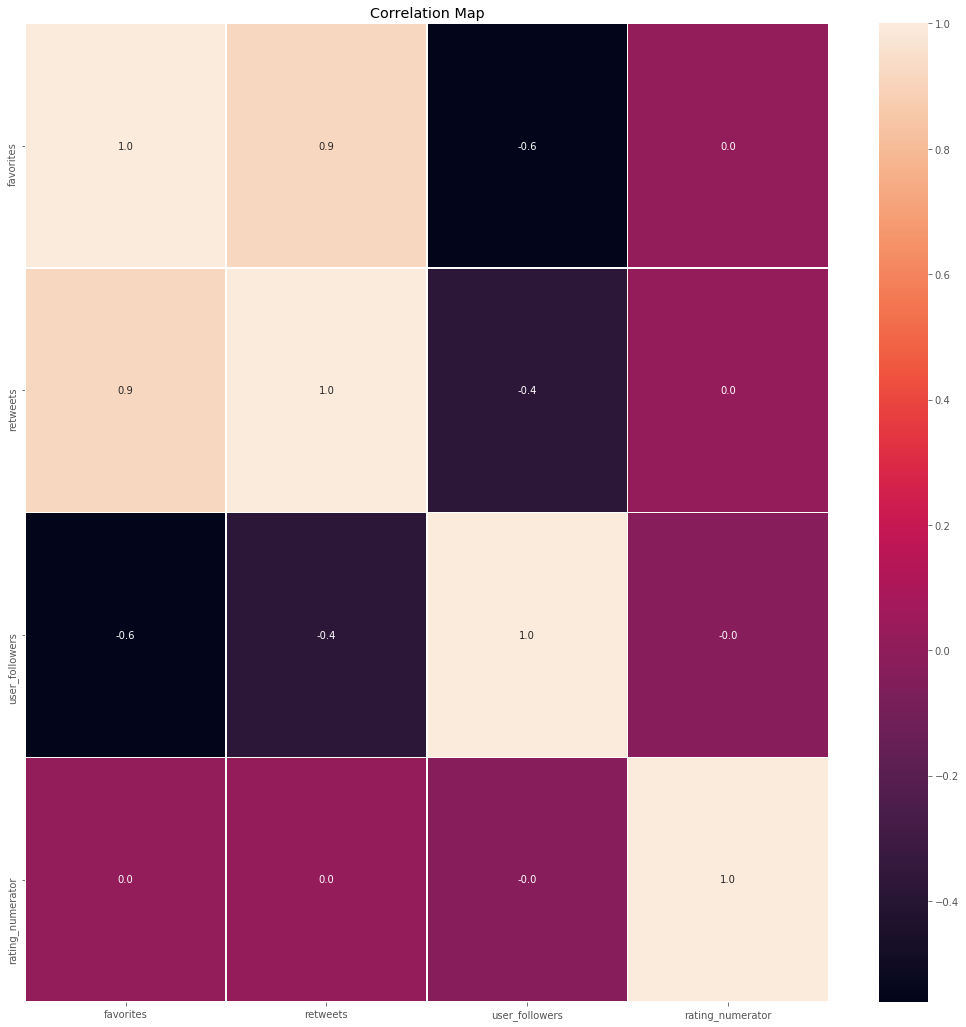

In [80]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df[['source', 'favorites','retweets',
                'user_followers','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we see here is between favorites and retweet, this is normal (more favorites mean more retweets)
- User followers and retweet have a weak negative correlation of -0.4 (this seems the opposite of normal prediction)
- Rating don't get affected with any other variable from the ones we ploted

**Tweet Retweet Vs Favorites**

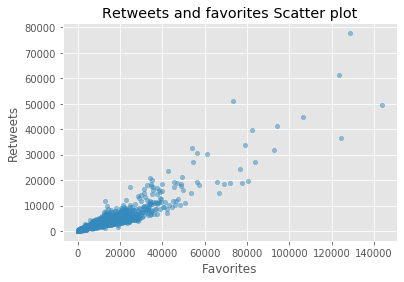

In [83]:
df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot');

- As the correlation map shows that retweet is high correlated with favorites.

## Rating System

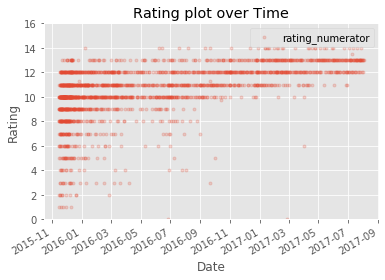

In [84]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating');

- The page start with small rating than they adopt the system of rating numerator more than the denominator

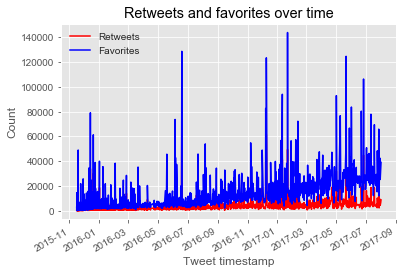

In [85]:
df['retweets'].plot(color = 'red', label='Retweets')
df['favorites'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show();

- Brent has all the right to get mad (ratings getting higher with no specific reason)

C:\Users\sidhi\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sidhi\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


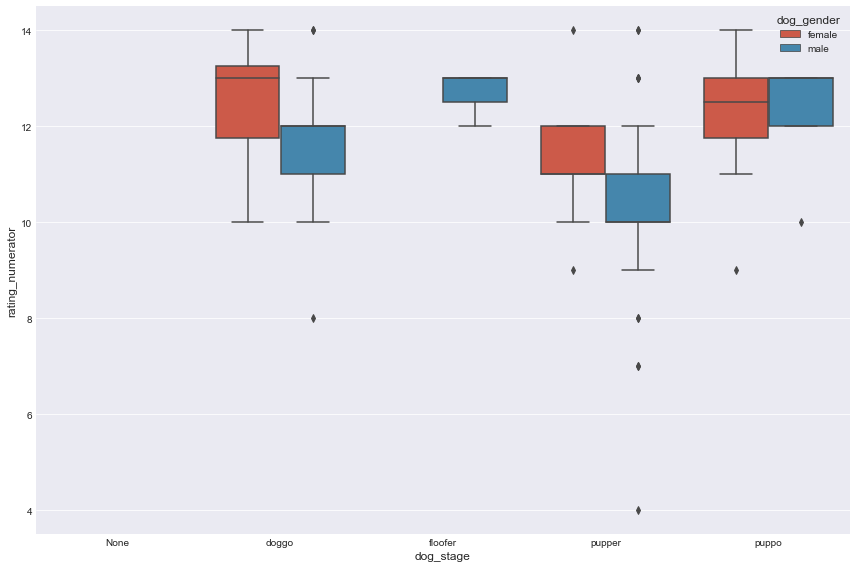

In [86]:
sns.factorplot(kind='box',        
               y='rating_numerator',       
               x='dog_stage', 
               hue='dog_gender',  
               data=df[df['dog_stage'] != 'None'], 
               size=8,               
               aspect=1.5,   
               legend_out=False);

According to our treatment (getting the gender from the text of the tweet) we have male dogs more than female dogs in our dataset, whatever the female rating mean more than the male rating mean

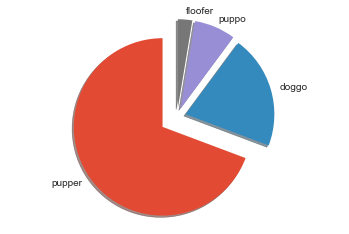

In [88]:
# Plot the data partitioned by dog stage
dog_stage_count = list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal');

In [89]:
df[df['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
None             NaN
doggo      11.888889
floofer    11.875000
pupper     10.638066
puppo      12.043478
Name: rating_numerator, dtype: float64

## Conclusion
The Twitter account WeRateDogs (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "16/10". It has acquired over 4.5 million followers.

If you are thinking of adopting a dog, get a floof(er) - far away from being pupper at least still in the stage of puppo yet not a doggo to live more togother